# Dataset: Anti-Reproductive Rights Crimes 
(Source: https://openjustice.doj.ca.gov/data) 

The goal of this analysis is to group offenses related to Anti-Reproductive Rights Crimes (ARRC) into smaller, similar cohorts using data collected by the Department of Justice (DOJ) Criminal Justice Statistics Center (CJSC). Our objective is to identify patterns and relationships between key factors. In this report, we will explore clustering methods to group the offenses based on similarities across different factors. By analyzing these patterns, we aim to reveal common behaviors within each group of offenses.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import warnings

In [2]:
# Load the dataset
df = pd.read_csv("C:/Users/sbyeo/OneDrive/바탕 화면/Projects/Data_Science/Anti-Reproductive Rights Crimes\ARRC_2004-2023.csv")

## Data Exploration & Data Cleaning

In [3]:
df.head()

,ARRC ID,NCIC AGENCY CODE,YEAR,MONTH,LOCATION TYPE,TYPE OF LOSS,VALUE,PROPERTY CATEGORY,QUANTITY,S.RACE,...,V.RACE,V.GENDER,VICTIM TYPE,WEAPON,OFFENSE CODE,CODE TYPE,DESCRIPTION,CHARGE TYPE,BCS CODE,SUMMARY CODE
0,4272,3313,2004,4,Public Reproductive Health Facility,NaN,NaN,NaN,NaN,Hispanic,...,Hispanic,Female,Individual Employee,NaN,423.2(A),PC,VIOLENCE/ETC:REP HLTH SVS,M,399.0,30.0
1,5063,4807,2004,4,Public Reproductive Health Facility,"Destroyed, Damaged, or Vandalized",0.0,Public/Community,1.0,Unknown,...,NaN,NaN,Health Facility,NaN,374.3(A),PC,DUMP WAST:PUB/ETC:COMERCL,M,58.0,60.0
2,1508,3318,2004,4,Public Reproductive Health Facility,NaN,NaN,NaN,NaN,White,...,Hispanic,Female,Individual Client,Handgun,664/187(A),PC,ATTEMPTED MURDER,F,300.0,6.0
3,3261,4502,2004,6,Public Reproductive Health Facility,NaN,NaN,NaN,NaN,White,...,White,Female,Individual Employee,NaN,422,PC,THRTN CRIME:INT:TERRORIZE,F,345.0,6.0
4,3261,4502,2004,6,Public Reproductive Health Facility,NaN,NaN,NaN,NaN,White,...,White,Female,Individual Employee,NaN,422,PC,THRTN CRIME:INT:TERRORIZE,F,345.0,6.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ARRC ID            138 non-null    object 
 1   NCIC AGENCY CODE   138 non-null    int64  
 2   YEAR               138 non-null    int64  
 3   MONTH              138 non-null    int64  
 4   LOCATION TYPE      138 non-null    object 
 5   TYPE OF LOSS       84 non-null     object 
 6   VALUE              66 non-null     float64
 7   PROPERTY CATEGORY  84 non-null     object 
 8   QUANTITY           75 non-null     float64
 9   S.RACE             137 non-null    object 
 10  S.GENDER           137 non-null    object 
 11  V.RACE             74 non-null     object 
 12  V.GENDER           74 non-null     object 
 13  VICTIM TYPE        138 non-null    object 
 14  WEAPON             41 non-null     object 
 15  OFFENSE CODE       137 non-null    object 
 16  CODE TYPE          137 non

In [5]:
df.isnull()

,ARRC ID,NCIC AGENCY CODE,YEAR,MONTH,LOCATION TYPE,TYPE OF LOSS,VALUE,PROPERTY CATEGORY,QUANTITY,S.RACE,...,V.RACE,V.GENDER,VICTIM TYPE,WEAPON,OFFENSE CODE,CODE TYPE,DESCRIPTION,CHARGE TYPE,BCS CODE,SUMMARY CODE
0,False,False,False,False,False,True,True,True,True,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,True,True,True,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,True,True,True,True,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,False,False,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
134,False,False,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
135,False,False,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
136,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False


In [6]:
# Calculate the percentage of missing values in each column
missing_values_count = df.isnull().sum()
missing_values_percentage = (missing_values_count / len(df)) * 100

# Display as the dataframe
missing_values_df = pd.DataFrame({'Missing Values Count': missing_values_count, 'Percentage': missing_values_percentage})
missing_values_df

,Missing Values Count,Percentage
ARRC ID,0,0.000000
NCIC AGENCY CODE,0,0.000000
YEAR,0,0.000000
MONTH,0,0.000000
LOCATION TYPE,0,0.000000
TYPE OF LOSS,54,39.130435
VALUE,72,52.173913
PROPERTY CATEGORY,54,39.130435
QUANTITY,63,45.652174
S.RACE,1,0.724638


In [7]:
# Drop columns with a high percentage of missing values(more than 50%)
df.drop(columns=['VALUE', 'WEAPON'], inplace=True)

In [8]:
# Fill missing values for columns with moderate mising data(20-~50%)
df['TYPE OF LOSS'].fillna('None', inplace=True)
df['PROPERTY CATEGORY'].fillna('Unknown', inplace=True)
df['QUANTITY'].fillna(df['QUANTITY'].median(), inplace=True)
df['V.RACE'].fillna('Unknown', inplace=True)
df['V.GENDER'].fillna('Unknown', inplace=True)

In [9]:
# Fill missing values for columns with low percentage of mising data(less than 5%)
df['S.RACE'].fillna('Unknown', inplace=True)
df['S.GENDER'].fillna('Unknown', inplace=True)
df['OFFENSE CODE'].fillna('Unknown', inplace=True)
df['CODE TYPE'].fillna('Unknown', inplace=True)
df['DESCRIPTION'].fillna('Unknown', inplace=True)
df['CHARGE TYPE'].fillna('Unknown', inplace=True)
df['BCS CODE'].fillna(df['BCS CODE'].mode()[0], inplace=True)
df['SUMMARY CODE'].fillna(df['SUMMARY CODE'].mode()[0], inplace=True)

In [10]:
df.isnull().sum()

ARRC ID              0
NCIC AGENCY CODE     0
YEAR                 0
MONTH                0
LOCATION TYPE        0
TYPE OF LOSS         0
PROPERTY CATEGORY    0
QUANTITY             0
S.RACE               0
S.GENDER             0
V.RACE               0
V.GENDER             0
VICTIM TYPE          0
OFFENSE CODE         0
CODE TYPE            0
DESCRIPTION          0
CHARGE TYPE          0
BCS CODE             0
SUMMARY CODE         0
dtype: int64

In [11]:
# Get the count of unique values for each column
df.nunique()

ARRC ID              115
NCIC AGENCY CODE      41
YEAR                  19
MONTH                 12
LOCATION TYPE         10
TYPE OF LOSS           8
PROPERTY CATEGORY     14
QUANTITY               5
S.RACE                 7
S.GENDER               4
V.RACE                 8
V.GENDER               4
VICTIM TYPE            8
OFFENSE CODE          37
CODE TYPE              4
DESCRIPTION           45
CHARGE TYPE            5
BCS CODE              22
SUMMARY CODE          13
dtype: int64

In [12]:
# Drop irrelevant columns
df.drop(columns=['ARRC ID', 'NCIC AGENCY CODE', 'DESCRIPTION'], inplace=True)

In [13]:
# Don't consider v.race and v.gender which are having almost 50% of missing values
categorical_cols = ['LOCATION TYPE', 'TYPE OF LOSS', 'PROPERTY CATEGORY', 'S.RACE', 'S.GENDER', 'VICTIM TYPE', 'CODE TYPE', 'CHARGE TYPE']

# One hot encoding catagorical columns 
df_encoded = pd.get_dummies(df, columns=categorical_cols)
pd.options.display.max_info_columns = 100
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 68 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   YEAR                                                                         138 non-null    int64  
 1   MONTH                                                                        138 non-null    int64  
 2   QUANTITY                                                                     138 non-null    float64
 3   V.RACE                                                                       138 non-null    object 
 4   V.GENDER                                                                     138 non-null    object 
 5   OFFENSE CODE                                                                 138 non-null    object 
 6   BCS CODE                                  

In [14]:
# Select numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = df.select_dtypes(include=numerics).columns

In [15]:
# Scaling
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
df_encoded[numerical_cols].head()

,YEAR,MONTH,QUANTITY,BCS CODE,SUMMARY CODE
0,-1.393174,-0.593203,0.043207,0.705428,-0.135171
1,-1.393174,-0.593203,0.043207,-0.948915,1.749030
2,-1.393174,-0.593203,0.043207,0.225135,-1.642532
3,-1.393174,0.024624,0.043207,0.443450,-1.642532
4,-1.393174,0.024624,0.043207,0.443450,-1.642532


# Clustering in multiple different ways

Crimes can be influenced by various factors and to better understand the patterns and impacts of crimes in the dataset, we have divided the features into four main categories: location-based, crime characteristics, demographic, and legal features. This grouping ensures that related variables are analyzed together to reveal meaningful patterns and relationships.

In [16]:
# Grouping features by similarity
location_features = [col for col in df_encoded.columns if 'LOCATION TYPE' in col]
crime_features = [col for col in df_encoded.columns if 'TYPE OF LOSS' in col or 'PROPERTY CATEGORY' in col]
demographic_features = [col for col in df_encoded.columns if 'S.RACE' in col or 'S.GENDER' in col or 'VICTIM TYPE' in col]
legal_features = [col for col in df_encoded.columns if 'CODE TYPE' in col or 'CHARGE TYPE' in col]

feature_groups = {
    'Location-Based Features': location_features,
    'Crime Characteristics': crime_features,
    'Demographic Features': demographic_features,
    'Legal Features': legal_features
}
feature_groups

{'Location-Based Features': ['LOCATION TYPE_Commercial/Office Building',
  'LOCATION TYPE_Government/Public Building',
  'LOCATION TYPE_Other',
  'LOCATION TYPE_Parking Lot/Garage',
  'LOCATION TYPE_Private Reproductive Health Facility',
  'LOCATION TYPE_Public Health Facility',
  'LOCATION TYPE_Public Reproductive Health Facility',
  'LOCATION TYPE_Residence/Home/Driveway',
  'LOCATION TYPE_Residential Facility',
  'LOCATION TYPE_School/College'],
 'Crime Characteristics': ['TYPE OF LOSS_Burned',
  'TYPE OF LOSS_Destroyed, Damaged, or Vandalized',
  'TYPE OF LOSS_Destroyed/Damaged',
  'TYPE OF LOSS_Destroyed/Damaged/Vandalized',
  'TYPE OF LOSS_Destruction/Damage/Vandalism of Property',
  'TYPE OF LOSS_None',
  'TYPE OF LOSS_Stolen',
  'TYPE OF LOSS_Unknown',
  'PROPERTY CATEGORY_  ',
  'PROPERTY CATEGORY_Automobiles (includes pickups, SUVs, etc.)',
  'PROPERTY CATEGORY_Commercial/Business',
  'PROPERTY CATEGORY_Office-type Equipment',
  'PROPERTY CATEGORY_Other',
  'PROPERTY CATEGORY

Location can have a significant impact on crime patterns. By grouping location-related features, we can analyze how different environments influence criminal behavior.</br>
</br>By grouping crimes based on the type of loss and property category, we can better understand the patterns and impacts of crimes. This allows us to investigate whether certain types of property are more frequently targeted or how the impact of different types of losses varies across crime incidents.</br>
</br>The demographic group captures information about the individuals involved in the crime, including the suspect's race, gender, and the victim's type. Demographic features are relevant when analyzing crime patterns because certain demographics may be more frequently involved as victims or suspects in specific types of crimes. This group allows us to analyze how demographics correlate with different types of offenses.</br>
</br>The last group focuses on the legal attributes of the offenses, such as the code type and charge type. By grouping crimes based on these features, we can see how different legal outcomes relate to crime characteristics and patterns. For example, felonies may be more common in certain types of offenses or locations, while misdemeanors may be more prevalent in others.

In [27]:
warnings.filterwarnings("ignore")
os.environ['LOKY_MAX_CPU_COUNT'] = '4'

cluster_results = {}
for group_name, features in feature_groups.items():
    # Subset the data to include only the selected features
    df_subset = df_encoded[features]
    
    # K-Means Clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(df_subset)
    
    # Calculate silhouette score to evaluate the clustering
    silhouette_avg = silhouette_score(df_subset, clusters)
    cluster_results[group_name] = silhouette_avg
    
    print(f"Silhouette Score for {group_name}: {silhouette_avg}")

NameError: name 'os' is not defined

A silhouette score above 0.8 suggests that the data points within each cluster are similar to each other and the clusters themselves are well separated. Based on that, the silhouette score of **0.818** indicates that the clusters formed from location based features are well defined and distinct. We can infer that locations play a significant role in differentiating crime patterns. The environment where a crime occurs seems to strongly influence the nature of the incident.</br>
</br>The silhouette score of **0.430** indicates that while some patterns exist, the clusters are less distinct compared to location based features. The score suggests that there is overlap between the clusters, indicating some crime characteristics are not clearly differentiated. Crime characteristics may not strongly separate different crime patterns, possibly due to commonalities in the types of crimes or the properties affected.</br>
</br>The silhouette score of **0.327** indicates weak clustering. The score suggests that demographic features do not form well separated clusters, indicating significant overlap between groups based on demographic characteristics. This implies that demographic characteristics may not be the primary factor in differentiating crime patterns. While demographics are important, they may not create clear distinctions in crime clustering compared to location or legal outcomes.</br>
</br>The silhouette score of **0.870** is very high, indicating the clusters formed based on legal features are well defined and distinct. A score near 1 suggests strong separation between clusters. Legal features, such as whether the charge is a felony or misdemeanor, play a key role in distinguishing between different groups of crimes. The legal outcomes associated with offenses provide clear distinctions in crime patterns, making this a strong differentiating factor.

In [18]:
# Select key features
selected_features = location_features + legal_features
df_selected = df_encoded[selected_features]

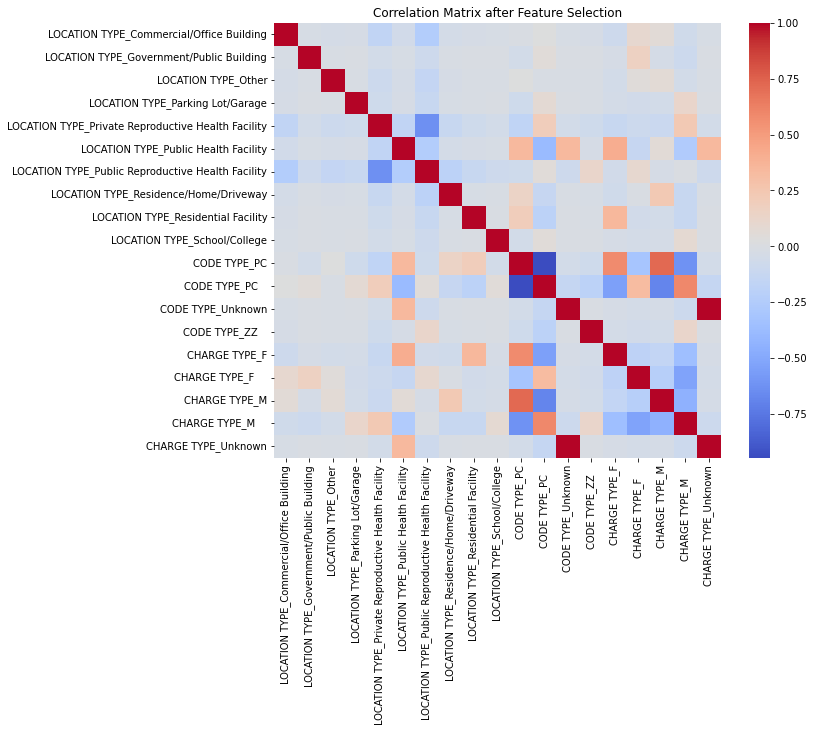

In [19]:
# Recompute and visualize the correlation matrix for the reduced feature set
corr_matrix_reduced = df_selected.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_reduced, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix after Feature Selection')
plt.show()

### K-Means Clustering

In [20]:
kmeans_final = KMeans(n_clusters=9, random_state=42)
df_encoded['final_cluster'] = kmeans_final.fit_predict(df_selected)
final_silhouette = silhouette_score(df_selected, df_encoded['final_cluster'])

print(f"Silhouette Score with selected features: {final_silhouette}")

Silhouette Score with selected features: 0.7144480124965814


The drop in the silhouette score indicates that increasing the number of clusters to 9, even with high-scoring features, resulted in less well defined clusters.

The silhouette score of 0.714 is lower than expected, despite using only the features with high scores(location and legal features) and increasing the number of clusters to match the number of locations. While 9 clusters gave a lower silhouette score, showing reasonably well defined clusters, there's still room for improvement. We can enhance the results by adjusting the number of clusters using the elbow method to find the optimal value and trying different clustering algorithms.

### Elbow Method 

Silhouette score for 2 clusters: 0.4247398351964585
Silhouette score for 3 clusters: 0.442020845790972
Silhouette score for 4 clusters: 0.5609757548452642
Silhouette score for 5 clusters: 0.5855576418468773
Silhouette score for 6 clusters: 0.6487760205099432
Silhouette score for 7 clusters: 0.6424278483761361
Silhouette score for 8 clusters: 0.6626762767734523
Silhouette score for 9 clusters: 0.7144480124965814
Silhouette score for 10 clusters: 0.7372098777622844
Silhouette score for 11 clusters: 0.7649506382662984
Silhouette score for 12 clusters: 0.7934091362900136
Silhouette score for 13 clusters: 0.8083159685881502
Silhouette score for 14 clusters: 0.8300674035210657


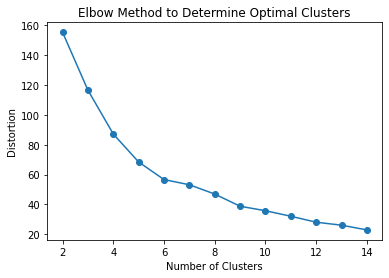

In [21]:
distortions = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_selected)
    distortions.append(kmeans.inertia_)
    
    clusters = kmeans.fit_predict(df_selected)
    silhouette_avg = silhouette_score(df_selected, clusters)
    print(f"Silhouette score for {i} clusters: {silhouette_avg}")

plt.plot(range(2, 15), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.show()

Silhouette scores increased as the number of clusters increased, peaking at 14 clusters with a silhouette score of 0.8301.

### Visualization of K-Means Clustering with t-SNE Using the Optimized Number of Clusters

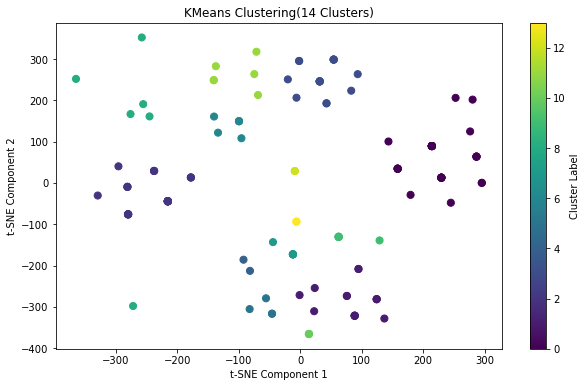

In [22]:
kmeans_optimized = KMeans(n_clusters=14, random_state=42)
df_encoded['final_cluster'] = kmeans_optimized.fit_predict(df_selected)
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df_selected)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df_encoded['final_cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster Label')
plt.title("KMeans Clustering(14 Clusters)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

### Hierarchical Clustering

In [23]:
hierarchical = AgglomerativeClustering(n_clusters=9)
df_encoded['final_cluster'] = hierarchical.fit_predict(df_selected)
final_silhouette = silhouette_score(df_selected, df_encoded['final_cluster'])

print(f"Silhouette Score with hierarchical clustering: {final_silhouette}")

Silhouette Score with hierarchical clustering: 0.7319545810320404


Using Agglomerative Clustering with 9 clusters yields a silhouette score of 0.732, which is a slight improvement over KMeans with 9 clusters.

### PCA for Dimensionality Reduction

In [24]:
pca = PCA(n_components=5)
pca_df = pca.fit_transform(df_selected)

# Perform clustering on PCA-transformed data
kmeans_transformed = KMeans(n_clusters=9, random_state=42)
df_encoded['final_cluster'] = kmeans_transformed.fit_predict(pca_df)
final_silhouette = silhouette_score(pca_df, df_encoded['final_cluster'])

print(f"Silhouette Score with PCA-reduced features: {final_silhouette}")

Silhouette Score with PCA-reduced features: 0.8341649460810097


After applying PCA and reducing the data to 5 principal components, the silhouette score improved to 0.834, indicating better defined clusters with less noise and redundancy.

### Hierarchical Clustering on PCA Reduced Features

In [25]:
hierarchical = AgglomerativeClustering(n_clusters=9)
df_encoded['final_cluster'] = hierarchical.fit_predict(pca_df)
final_silhouette = silhouette_score(pca_df, df_encoded['final_cluster'])

print(f"Silhouette Score with PCA and hierarchical clustering: {final_silhouette}")

Silhouette Score with PCA and hierarchical clustering: 0.8414116849516682


By combining PCA and Agglomerative Clustering, the silhouette score improved further to 0.841, suggesting that this combination provides well separated clusters.

### t-SNE Visualization of Hierarchical Clustering on PCA Reduced Features

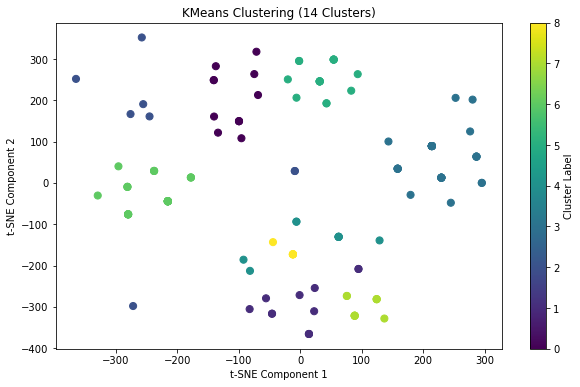

In [26]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df_selected)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df_encoded['final_cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster Label')
plt.title("KMeans Clustering (14 Clusters)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

The clustering has revealed distinct and well separated clusters, with clear groupings that suggest similarity within clusters. While many clusters are tightly packed and well defined, a few points positioned between clusters may require further investigation for potential overlaps or outliers.

The variability in cluster sizes could indicate that certain types of offenses or patterns are more prevalent in the dataset, while others may be less common but potentially more diverse. The overall color mapping effectively visualizes the separation of clusters, providing a clear indication of how the offenses are grouped.

In conclusion, we tested multiple approaches to improve clustering. The combination of PCA and K-Means produced the highest silhouette score of 0.834 with 9 clusters, indicating well separated and cohesive clusters. While Hierarchical Clustering performed reasonably well, it did not outperform PCA and K-Means. The Elbow Method suggests that the silhouette score continues to improve as the number of clusters increases, with 12–14 clusters likely providing the best results.